In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex2/ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


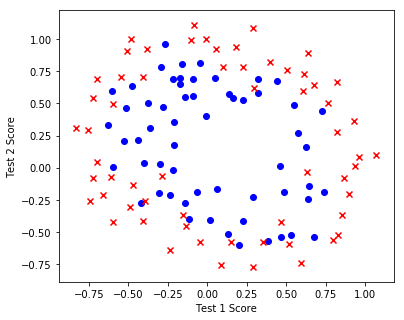

In [3]:
pos = data[data.Accepted.isin(['1'])]
neg = data[data.Accepted.isin(['0'])]

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(pos['Test 1'], pos['Test 2'], c='b', label='Accepted')
ax.scatter(neg['Test 1'], neg['Test 2'], c='r', label='Not Accepted', marker='x')

ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(X, y, theta):
    h = sigmoid(np.dot(X, theta.T))
    _sum = np.sum((-y * np.log(h)) - ((1 - y) * np.log(1 - h)))
    return _sum / len(X)

def gradient(X, y, theta):
    return (np.dot(X.T, sigmoid(np.dot(X, theta.T)) - y) / len(X)).T

def GD(X, y, theta, alpha, epoch):
    temp = np.array([[0]*theta.shape[1]])
    _cost = []
    m = X.shape[0]
    
    for i in range(epoch):
        temp = theta - (alpha / m) * gradient(X, y, theta)
        theta = temp
        _cost.append(cost(X, y, theta))
        
        if i % 5000 == 0:
            print('epoch:', i, 'cost:', theta[0])
    
    return theta, _cost

def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for p in np.arange(i + 1):
            data["f{}{}".format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)

    return pd.DataFrame(data)

In [5]:
data.insert(0, 'ones', 1)
data.head()

,ones,Test 1,Test 2,Accepted
0,1,0.051267,0.69956,1
1,1,-0.092742,0.68494,1
2,1,-0.213710,0.69225,1
3,1,-0.375000,0.50219,1
4,1,-0.513250,0.46564,1


In [6]:
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:, -1:])

In [7]:
X = np.hstack([X, np.power(X[:,1:2], 2)])
X = np.hstack([X, np.power(X[:,2:3], 2)])

In [8]:
theta = np.array([[0]*X.shape[1]])
X.shape, y.shape, theta.shape

((118, 5), (118, 1), (1, 5))

In [9]:
cost(X, y, theta)

0.6931471805599454

In [10]:
gradient(X, y, theta)

array([[8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
        3.76648474e-02]])

In [11]:
alpha = 0.8
epoch = 200000
f_theta, his_cost = GD(X, y, theta, alpha, epoch)

epoch: 0 cost: [-5.74547544e-05 -1.27376903e-04 -5.27262281e-07 -3.41319590e-04
 -2.55354897e-04]
epoch: 5000 cost: [ 0.4612939  -0.10366083  0.18650009 -1.23222899 -0.9205842 ]
epoch: 10000 cost: [ 0.87042466  0.05333084  0.39745618 -2.1367816  -1.6687874 ]
epoch: 15000 cost: [ 1.19821566  0.20738751  0.59146904 -2.85826493 -2.3018763 ]
epoch: 20000 cost: [ 1.46993259  0.33619697  0.76083656 -3.45054605 -2.84262264]
epoch: 25000 cost: [ 1.69957202  0.4432138   0.90752493 -3.94715853 -3.30842917]
epoch: 30000 cost: [ 1.89645968  0.53335527  1.03504624 -4.37061277 -3.713052  ]
epoch: 35000 cost: [ 2.06725554  0.6104081   1.14661671 -4.73660908 -4.06734094]
epoch: 40000 cost: [ 2.21687515  0.67711534  1.24488809 -5.0564503  -4.37983571]
epoch: 45000 cost: [ 2.34903179  0.73548084  1.33199563 -5.33850523 -4.65728306]
epoch: 50000 cost: [ 2.46658669  0.78699979  1.40965466 -5.58912538 -4.90505443]
epoch: 55000 cost: [ 2.57178397  0.83281263  1.47925004 -5.81323671 -5.12746744]
epoch: 60000

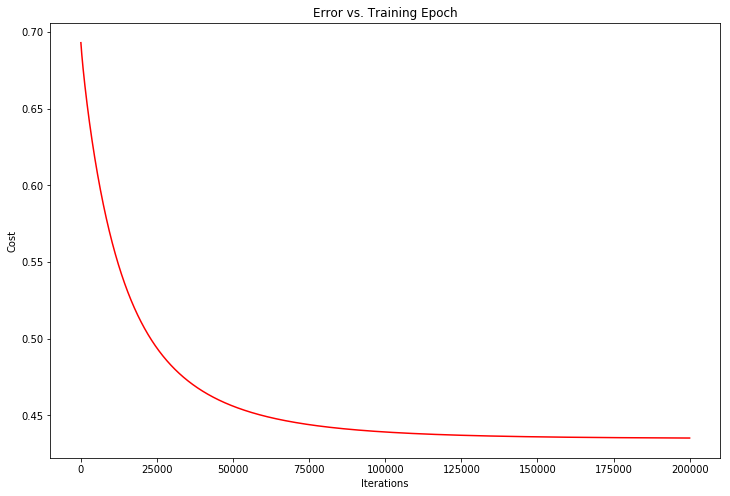

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), his_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [15]:
def predict(theta, X):
    prob = sigmoid(np.dot(X, theta.T))
    return [1 if x >= 0.5 else 0 for x in prob]

In [16]:
predictions = predict(f_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
accuracy

0.8050847457627118

# SKLEARN

In [17]:
from sklearn import linear_model

model = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

model.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
model.score(X, y)

0.7711864406779662

In [21]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        61
           1       0.79      0.81      0.80        57

   micro avg       0.81      0.81      0.81       118
   macro avg       0.80      0.81      0.80       118
weighted avg       0.81      0.81      0.81       118

